# **Spotify Basic Recommendation System Project**

Group 38 Members:

Ali Tarık Mırık \
Kaan Atmaca \
Melis Kudat

## Introduction



Spotify is one of the most popular music platforms that enables people to enjoy listening to music depending on their frame of mind and taste. By providing the users a large scale of songs that have different features such as danceability, acousticness, popularity, energy... In this platform, in an attempt to please the users, songs are being offered by Spotify according to the properties of the previous choices of the users. In our project, we examined more than one hundred sixty thousand (+160.000) data involving features of the songs and compared those features with each other in order to catch resemblances and make analysis according to those resemblances. Furthermore, we analyzed the most popular artists and songs in the stated years. In the following steps, the effect of the correlations of the features on the popularity of the songs will be analyzed by statistical tests and the alteration of the preference of the music genres by the time will be demonstrated. As a last step, according to our data analysis and observations, we will create a song recommendation system and predict the popularity of the upcoming songs.

## **Exploratory Data Analysis**

The datasets that we have examined involve the features of the songs on Spotify such as duration, energy, and danceability. In order to analyze the data and make connections, we used 5 datasets. Each dataset contains different features in different numbers. As an instance of this situation data_by_year.csv and data.csv can be given. The dataset of data_by_year involves 14 features about each year while data.csv contains 19 features of songs. The same situation can be observed in the other datasets as well. In order to make our analysis more relatable and multifarious we made use of the different datasets that were given to us. In this step, by using those datasets, we visualized our data by drawing scatters, matrices, and histograms in order to understand our data in a more preferable way. Besides, we analyzed the most popular songs and artists, and we researched about how the genres and features changed overtime.

### Loading Modules and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_main = pd.read_csv("/content/drive/My Drive/CS210/data.csv")
df_artist = pd.read_csv("/content/drive/My Drive/CS210/data_w_genres.csv")
df_genre = pd.read_csv("/content/drive/My Drive/CS210/data_by_genres.csv")
df_year = pd.read_csv("/content/drive/My Drive/CS210/data_by_year.csv")

### Description of the Dataset & Preprocessing

*We started by bringing the first 5 rows of our data into the forefront to visualize a small part of our data*


In [4]:
df_main.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
df_main.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


*We also printed the statistical properties of the feautes to take a general look to our data.*


In [6]:
df_main.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [7]:
print("Number of rows (samples) are:", df_main.shape[0], "rows")
print("Number of columns (features) are:", df_main.shape[1], "columns")
df_main.shape

Number of rows (samples) are: 174389 rows
Number of columns (features) are: 19 columns


(174389, 19)

In [8]:
print("Feature types and counts:")
df_main.info()

Feature types and counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64

#### Manipulating & Cleaning The Data

*We have over 160.000 rows in our data and there might be invalid situations such as null or unclear data. Also we wanted to add columns (from other datasets to our main dataset) to do so we merged and manipulated our datasets.*

*Firstly, we checked for null values in our data. As a result the data was clean and everything was properly assigned.*

In [9]:
df_main.isna()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*In the main dataset the "Artists" strings were stored with brackets and apostrophes. So we cleaned the strings then stored the cleaned strings in another column called "Artist".*

In [10]:
def clean_artist_name(artist_name):
  artist_name = artist_name.replace('[', '')
  artist_name = artist_name.replace(']', '')
  artist_name = artist_name.replace('"', '')
  artist_name = artist_name.replace('\'','')
  return artist_name

df_main["artist"] = df_main["artists"].apply(clean_artist_name) 

*We had dataframes for songs, artists, genres and years in different datasets. However, we needed the genre of songs to be in the same dataset with the main data set which also had the feature of years. To do so, we merged our df_artist and df_main to be able to observe and analyze the relationship between genres,years, and popularity.*

In [11]:
def assign_genre(artist_name):
  mask =  df_artist["artists"].values == artist_name
  df_new = df_artist.loc[mask]
  myList = df_new["genres"].tolist()
  return myList

df_main["genres"] = df_main["artist"].apply(assign_genre)  

In [12]:
df_main.head(14)[["artist", "name", "genres", "year"]]

,artist,name,genres,year
0,Mamie Smith,Keep A Song In Your Soul,"[['harlem renaissance', 'traditional blues']]",1920
1,Screamin Jay Hawkins,I Put A Spell On You,[],1920
2,Mamie Smith,Golfing Papa,"[['harlem renaissance', 'traditional blues']]",1920
3,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,[['circuit']],1920
4,Mixe,Xuniverxe,[['glitchcore']],1920
5,Mamie Smith & Her Jazz Hounds,Crazy Blues - 78rpm Version,[[]],1920
6,Mamie Smith,Don't You Advertise Your Man,"[['harlem renaissance', 'traditional blues']]",1920
7,Mamie Smith & Her Jazz Hounds,Arkansas Blues,[[]],1920
8,Francisco Canaro,La Chacarera - Remasterizado,"[['tango', 'vintage tango']]",1920
9,Meetya,Broken Puppet - Original Mix,[[]],1920


###  Visualizations Descriptive Statistics

*These histograms demonstrate the total counts of features (in the ranges of minimum and maximum values of each feature).*

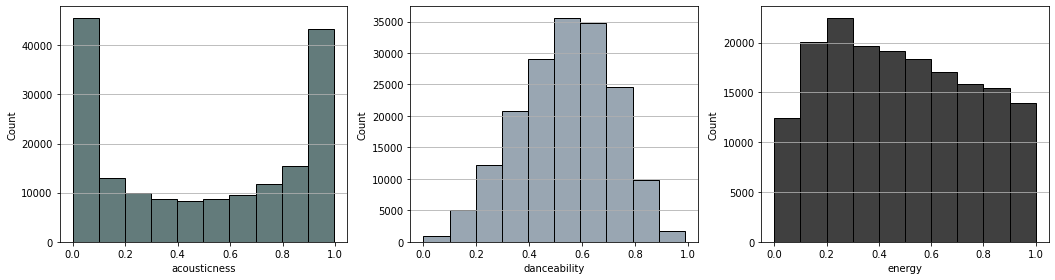

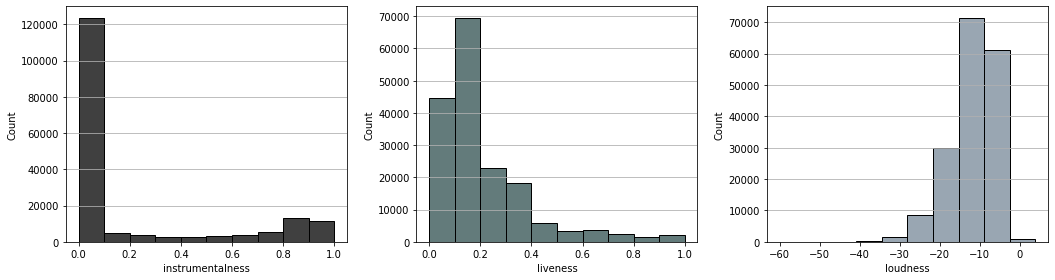

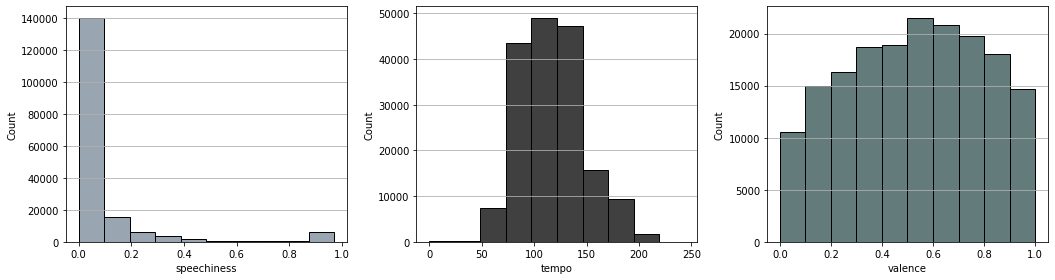

In [13]:
plt.figure(figsize=(44,4))
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
colors = ["darkslategray", "lightslategray", "black", "black", "darkslategray", "lightslategray", "lightslategray", "black", "darkslategray"]
for i in range(len(attrs)):
  plt.grid(axis="y")
  plt.subplot(1, len(attrs), i+1)
  sns.histplot(df_main[attrs[i]], bins=10, color = colors[i])
  if i == 2 or i == 5:
    plt.tight_layout()
    plt.grid(axis="y")
    plt.show()
    plt.figure(figsize=(43.15,4))
  
plt.tight_layout()
plt.grid(axis="y")
plt.show()

*This bar chart provides us the information about the means of the features of the songs which are released in the years between 1920 to 2021.*

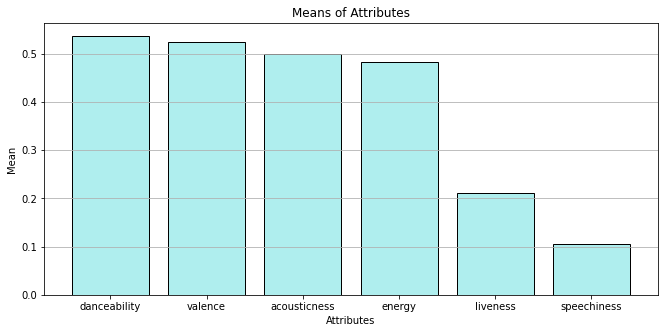

In [14]:
acc = df_main["acousticness"].mean()
liv = df_main["liveness"].mean()
ene = df_main["energy"].mean()
dan = df_main["danceability"].mean()
spe = df_main["speechiness"].mean()
val = df_main["valence"].mean()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'paleturquoise', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Mean')
plt.title("Means of Attributes")
plt.grid(axis="y")
plt.show()

*This bar chart provides us the information about the standart derivation of the features of the songs which are released in the years between 1920 to 2021.*

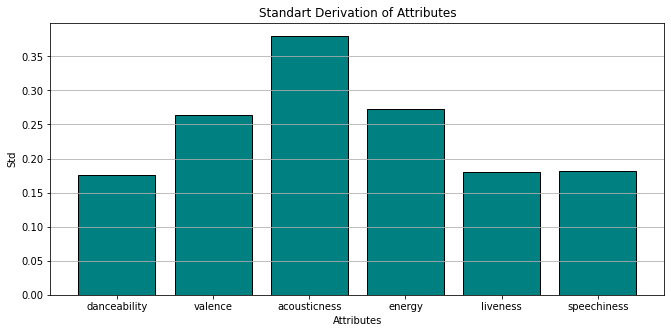

In [15]:
acc = df_main["acousticness"].std()
liv = df_main["liveness"].std()
ene = df_main["energy"].std()
dan = df_main["danceability"].std()
spe = df_main["speechiness"].std()
val = df_main["valence"].std()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'teal', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Std')
plt.title("Standart Derivation of Attributes")
plt.grid(axis="y")
plt.show()

*The following four scatter plots show the correlations of popularity with the features acousticness, liveness, energy, and danceability. Doing so we tried to find the correlations of the features with popularity.*

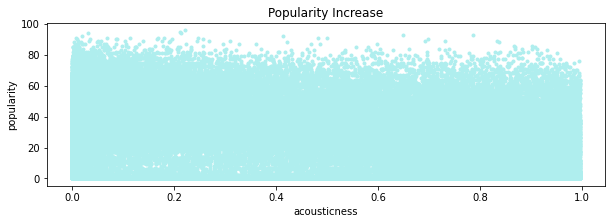

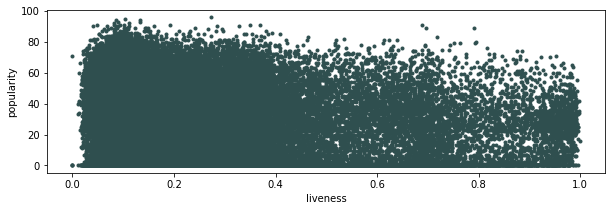

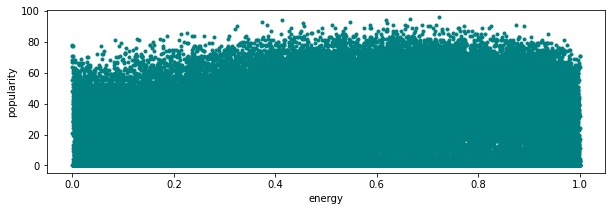

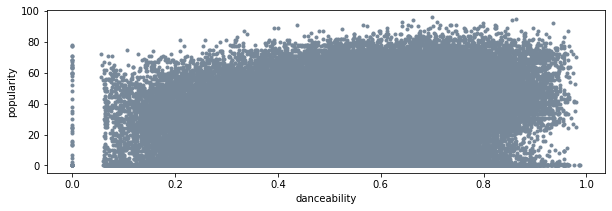

In [16]:
plt.figure(figsize=(10,3))
sample_data = df_main.sample(100000)
plt.title("Popularity Increase")
plt.scatter(sample_data["acousticness"], sample_data["popularity"], marker='.', color='paleturquoise', label='ys1')
plt.xlabel("acousticness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["liveness"], sample_data["popularity"], marker='.', color='darkslategray', label='ys2')
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["energy"], sample_data["popularity"], marker='.', color='teal', label='ys2')
plt.xlabel("energy")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["danceability"], sample_data["popularity"], marker='.', color='lightslategray', label='ys2')
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.show()

*This scatter plot demonstrates the correlation between loudness and energy, with this scatter plot we can observe that there is a positive correlation between those two features.*

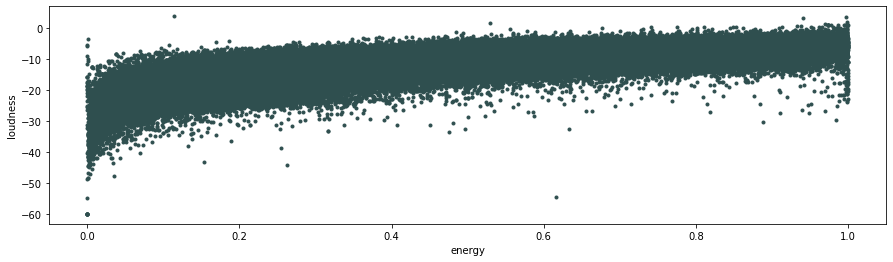

In [17]:
plt.figure(figsize=(15,4))
plt.scatter(df_main["energy"], df_main["loudness"], marker='.', color='darkslategray')
plt.xlabel("energy")
plt.ylabel("loudness")
plt.show()

*This plot shows the negative correlation between energy and acousticness.*

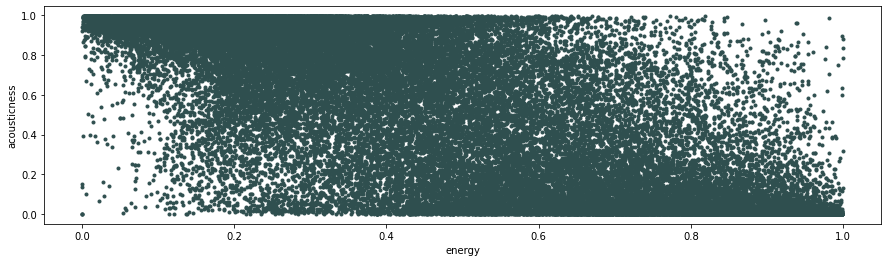

In [18]:
plt.figure(figsize=(15,4))
plt.scatter(df_main["energy"].head(50000), df_main["acousticness"].head(50000), marker='.', color='darkslategray', label='ys2')
plt.xlabel("energy")
plt.ylabel("acousticness")
plt.show()

*This correlation matrix demonstrates us the the correlations between all features that provides us to examine whether the correlation of two features are negative, positive or whether they are correlated or not.*

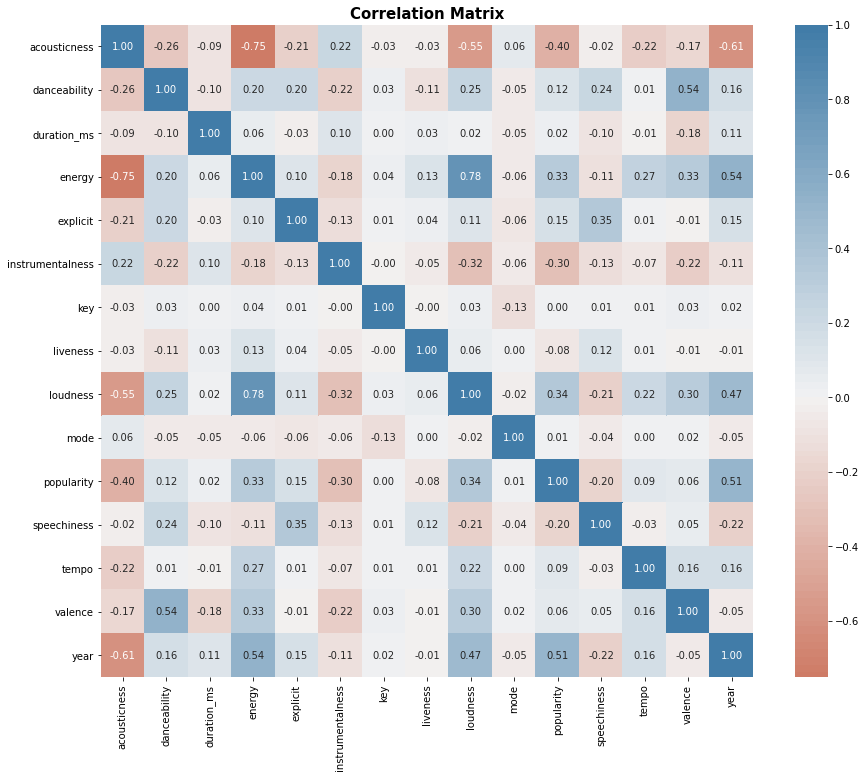

In [19]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 240, n=100)
corr = df_main.corr()
sns.heatmap(corr, annot=True, fmt=".2f",  cmap=palette, square=True, center = 0)
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

### Analysis of the Most Popular Artists and Songs

*The following horizontal bar chart provides us the top 10 songs that have the highest popularities between the years of 1920 and 2021*


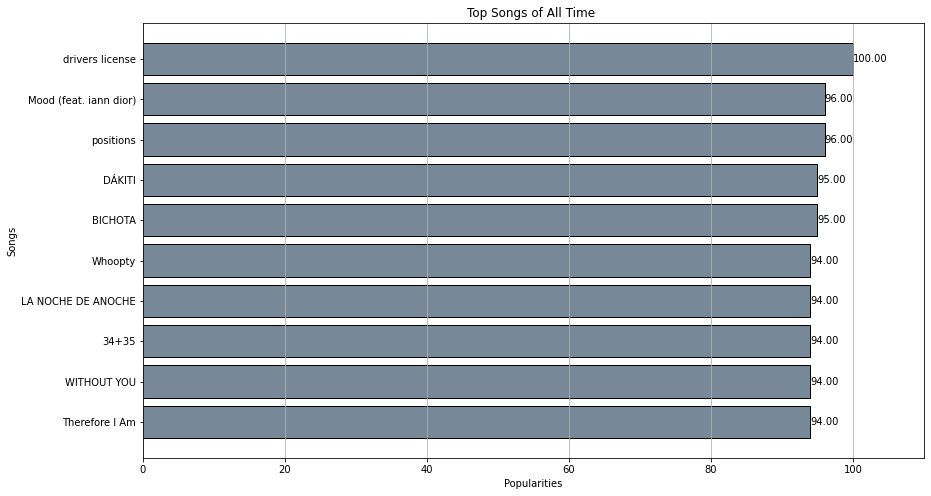

In [20]:
values = df_main.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = df_main.sort_values(by=["popularity"]).tail(10)["name"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color = "lightslategray", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Songs of All Time ")
plt.grid(axis="x")

plt.show()

*The following horizontal bar chart demonstrates the most popular artists in the year range of 1920-2021.*

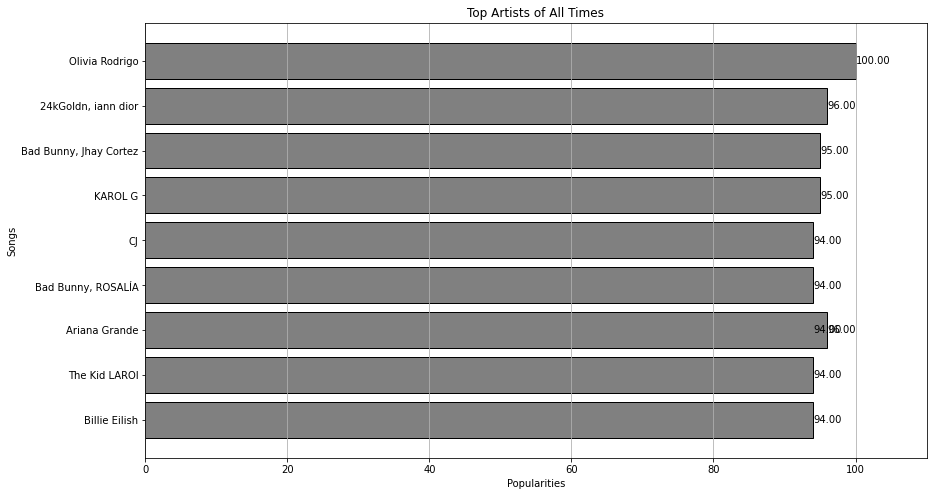

In [21]:
values = df_main.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
artists = df_main.sort_values(by=["popularity"]).tail(10)["artist"].to_list()
plt.figure(figsize=(14,8))
plt.barh(artists, values, color = "gray", edgecolor="black")

for value, cat in zip(values, artists):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Artists of All Times")
plt.grid(axis="x")
plt.show()

*In this part of the code, the year is asked to the user as an input. After the input is taken, the table gives the user information of the top 5 songs in the years between (input year - 5) and (input year + 5 )*

In [22]:
year = int(input("Enter a year between 1920-2021: "))
while(year < 1920 or year > 2021):
  year = input("Wrong input. Please enter a year between 1920-2021: ")
df_filtered = df_main[df_main["year"] < 5 + year]
df_filtered = df_filtered[df_filtered["year"] > year - 5]
df_filtered = df_filtered.sort_values(by=['popularity'], ascending=False)

print("Top five songs of", year-5, "-", year+5, ":")
df_filtered[["name", "artists", "popularity", "release_date"]].head(5)

Enter a year between 1920-2021: 2000
Top five songs of 1995 - 2005 :


,name,artists,popularity,release_date
15862,Yellow,['Coldplay'],85,2000-07-10
15868,In the End,['Linkin Park'],83,2000-10-24
16263,'Till I Collapse,"['Eminem', 'Nate Dogg']",83,2002-05-26
16265,The Scientist,['Coldplay'],83,2002-08-08
16264,Without Me,['Eminem'],82,2002-05-26


*In these bar charts we wanted to compare the means of the features of the most popular 50 songs and all the songs.*

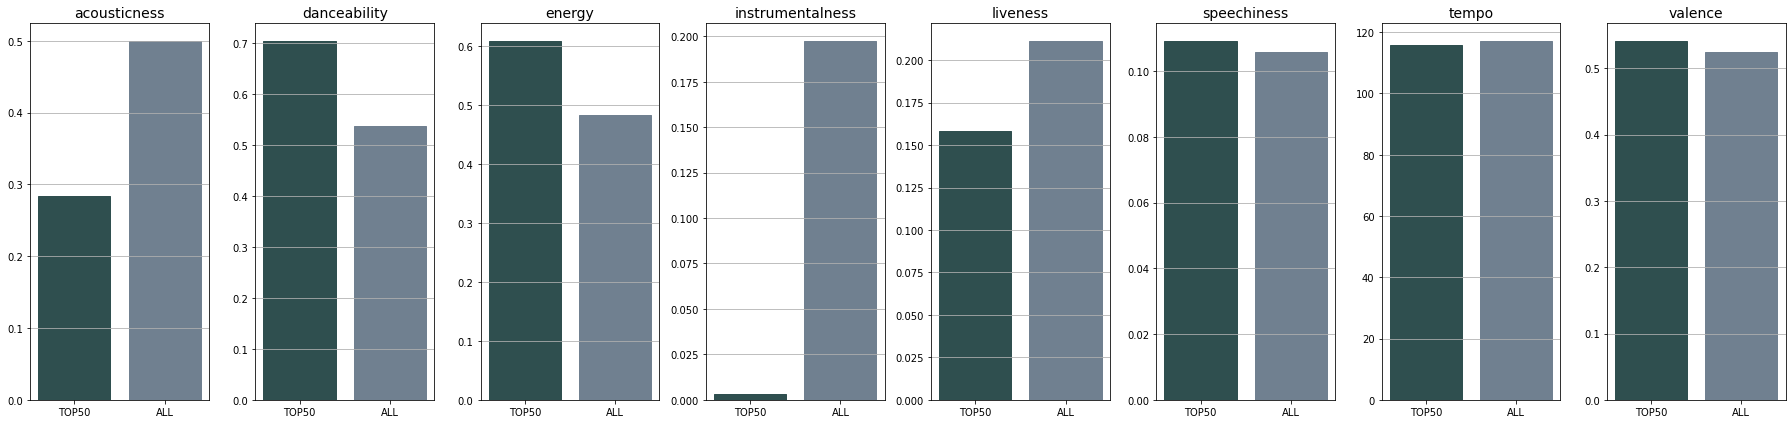

In [33]:
top_50 = df_main.sort_values(by=["popularity"]).tail(50)
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]
plot_data = {x:[top_50[x].mean(), df_main[x].mean()] for x in attrs}
fig, axs = plt.subplots(1,8, figsize=(25,6))
colors = ["darkslategray", "slategray"]

for i in range(8):
  a = axs[i].bar(["TOP50","ALL"],plot_data[attrs[i]], edgecolor="black")
  a[0].set_color(colors[0])
  a[1].set_color(colors[1])
  axs[i].set_title(attrs[i], fontsize=14)
  axs[i].grid(axis="y")

plt.tight_layout()
plt.show()

### Genres & Features Over Time

*The following horizontal bar chart provides us the top 10 most used genres in the years between 1920-2021*

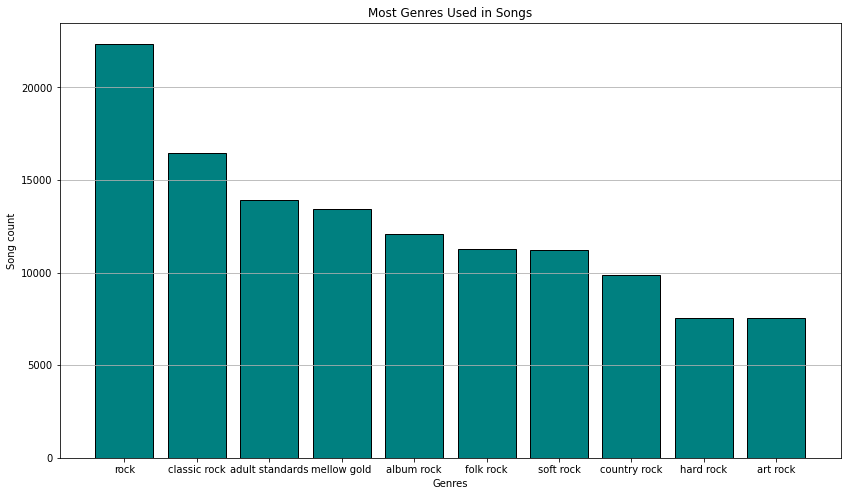

In [29]:
def get_mostused_genres():
  genre_popularities = {}
  for idx, song in df_main.iterrows():
    if len(song["genres"])!=0:
      genres = song["genres"][0].strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse() 
  for i in top_genres: 
    if i[0] == "" : 
      top_genres.remove(i)
  top_genres = top_genres[:10]
  return top_genres

top_genres=get_mostused_genres()
plt.figure(figsize=(14,8))
for i in top_genres:
  plt.bar(i[0], i[1], color="teal",  edgecolor="black")

plt.xlabel("Genres")
plt.ylabel("Song count")
plt.title("Most Genres Used in Songs")
plt.grid(axis="y")
plt.show()

*The following horizontal bar chart provides us the top 10 genres that have the highest popularities.*

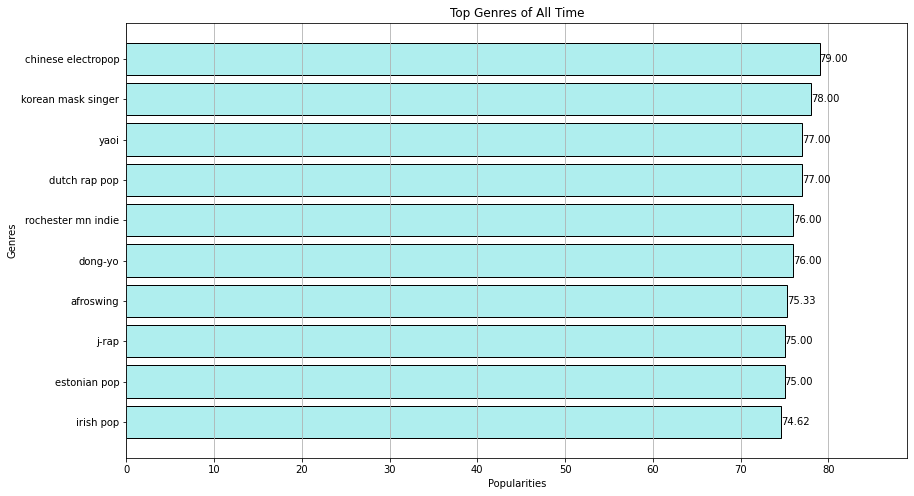

In [25]:
values = df_genre.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = df_genre.sort_values(by=["popularity"]).tail(10)["genres"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color="paleturquoise", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Genres")
plt.title("Top Genres of All Time")
plt.grid(axis="x")
plt.show()

*To analyze the genres change over time, we counted the number of songs in that genre in a range of years. We choose to analyze for every 10 years. There can be seen that some genres gain popularity over time and some become less popular. Pop songs for example, had a spike in popularity in recent years.*

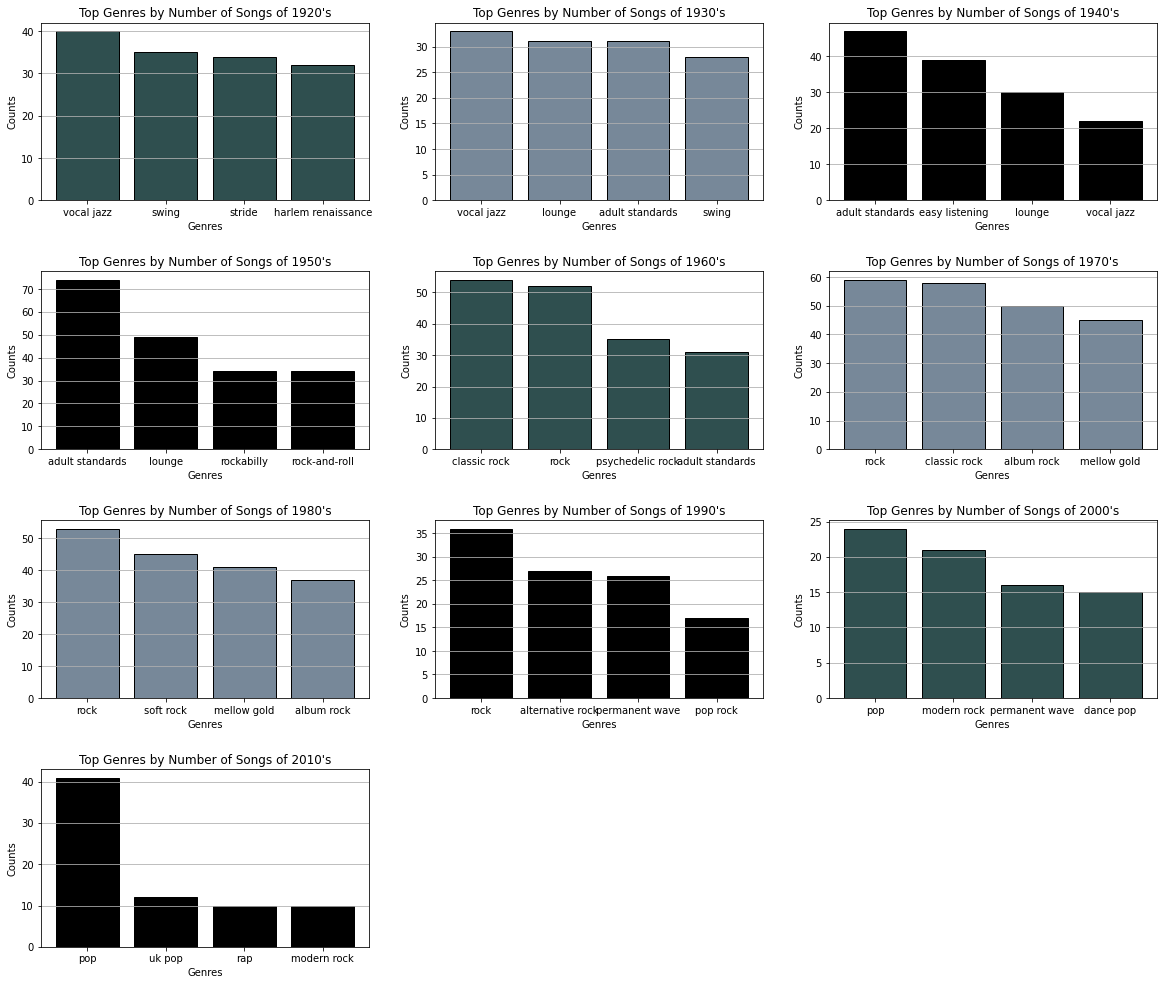

In [26]:
def get_popular_genres(year):
  df_top_songs = df_main[df_main["year"] < 5 + year]
  df_top_songs = df_top_songs[df_top_songs["year"] > year - 5]
  df_top_songs = df_top_songs.sort_values(by=['popularity'], ascending=False)
  df_top_songs = df_top_songs.head(100)

  genre_popularities = {}

  for idx, song in df_top_songs.iterrows():
    if len(song["genres"])!=0:
      genres = song["genres"][0].strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse()
  top_genres = top_genres[:4]

  return top_genres

colors = ["darkslategray", "lightslategray", "black", "black", "darkslategray", "lightslategray", "lightslategray", "black", "darkslategray", "black"]
fig, axs = plt.subplots(4,3,figsize=(20,17), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
for i in range(10):
  top_genres=get_popular_genres(1925 + i*10)
  genres = [x[0] for x in top_genres]
  counts = [x[1] for x in top_genres]
  axs[int(i/3), i%3].bar(genres, counts, color = colors[i], edgecolor="black")
  axs[int(i/3), i%3].set_title("Top Genres by Number of Songs of " + str(1920 + i*10) + "'s")
  axs[int(i/3), i%3].set_xlabel("Genres")
  axs[int(i/3), i%3].set_ylabel("Counts")
  axs[int(i/3), i%3].grid(axis="y")

fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])

plt.show()

*The lines in the plot demonstrate the increase or the decrease in the specified features of the songs in the time range of 1920-2021. According to the results, we can claim that zigzags are observed in all of the three features between 1920- 1950. After that year, liveness of the songs show stability while the other two properties demonstrate sharp increase and decrease.*

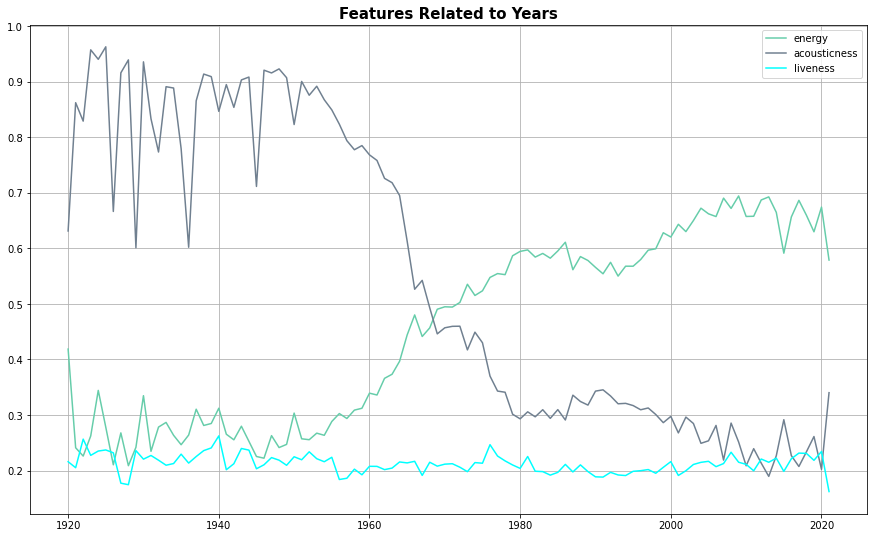

In [30]:
plt.figure(figsize=(15,9))
plt.plot(df_main.groupby('year').mean()['energy'], label="energy", color = "mediumaquamarine")
plt.plot(df_main.groupby('year').mean()['acousticness'], label="acousticness", color = "slategray")
plt.plot(df_main.groupby('year').mean()['liveness'], label="liveness", color = "aqua")
plt.legend()
plt.title("Features Related to Years",size=15, weight='bold')
plt.grid()
plt.show()

*In this part, we observed the state of affairs of two features that are instrumenalness and valence. By that, we can claim that for both of the two features, statibility is not observed while sharp increase and decrease are seen between the years of 1920-2020*

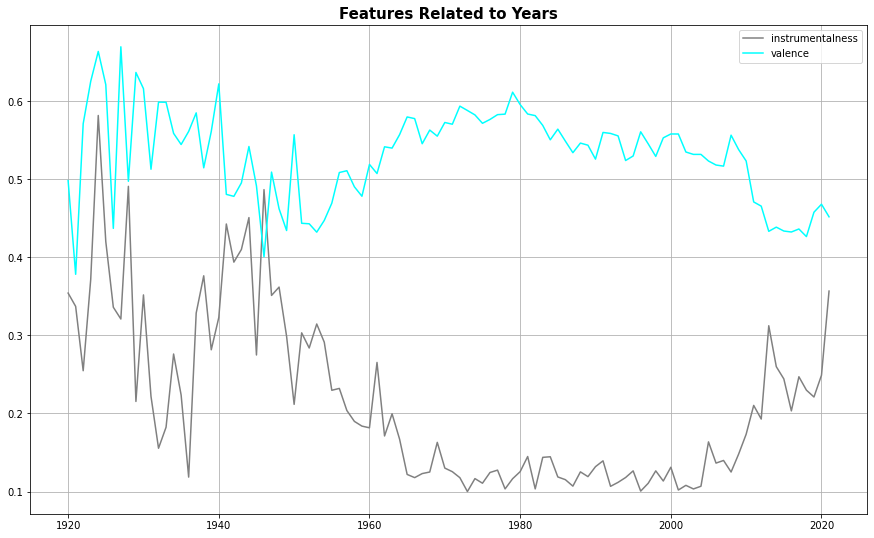

In [31]:
plt.figure(figsize=(15,9))
plt.plot(df_year.groupby('year').mean()['instrumentalness'], label="instrumentalness", color = "gray")
plt.plot(df_year.groupby('year').mean()['valence'], label="valence", color = "aqua")
plt.legend()
plt.title("Features Related to Years",size=15, weight='bold')
plt.grid()
plt.show()

##Future Work

As we have observed by analyzing and visualizing our data, the features of the songs have significant influence on the popularity of the songs on Spotify. Therefore, understanding how and in which range those features affect the popularity has a huge importance for the prediction of the popularity of the upcoming songs. In the next steps of our project, we will try to examine the contributions of the features on the popularity by applying statistical tests. Later on, we will evaluate the alteration of the features in a different timeline for the same music genres by statistical tests as well. As we stated before, the prediction of the songs’ popularity is extremely important to increase the preferability of the songs. Therefore, we will use several machine learning models to predict the popularity. In order to increase the productivity of the models, we will make endeavor on hyper-parameter tuning. As our last step, we will create our own song recommendation system by using similarities and methods such as Nearest Neighbors.

